# Car Price Prediction
------

In this notebook, I will be looking at a dataset containing data regarding various features or a spectrum of cars.

Taking these variables into account, I want to predict the end-car price.

-------

In [294]:
import pandas as pd
import numpy as np

# Data viz
import matplotlib.pyplot as plt
import seaborn as sn

# SciKitLearn Libraries
from sklearn.preprocessing import LabelEncoder # To encode any columnss
from sklearn.ensemble import RandomForestRegressor # Random Forest regressor model
from sklearn.model_selection import GridSearchCV # Used to find optimal n_estimators
from sklearn.model_selection import train_test_split # Split data into train & test sets
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error # Extracting R-Squared score | MSE | MSLE

In [7]:
df = pd.read_csv(r"C:\Users\ssc44611\Documents\(!) Machine Learning Projects\Supervised - Regression\Data\(01) Car Price Prediction\CarPrice_Assignment.csv")

In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
# Getting unique column names
cols = df.columns

In [23]:
cols

26

### Data Cleaning

In [31]:
# Finding any missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

There doesn't appear to be any missing data.

This dataset appears to be fairly clean, NFA.

---------
### EDA

In [30]:
# Let's describe our numerical data
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


---------
#### Visualise Distribution

Before we do this, we may want to drop various columns that mayn't be help - such as:
- car_ID
- CarName


In [55]:
dist_df = df.drop(['car_ID', 'CarName'], axis=1)

cols_dist_df = dist_df.columns

In [56]:
dist_df.head(1)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


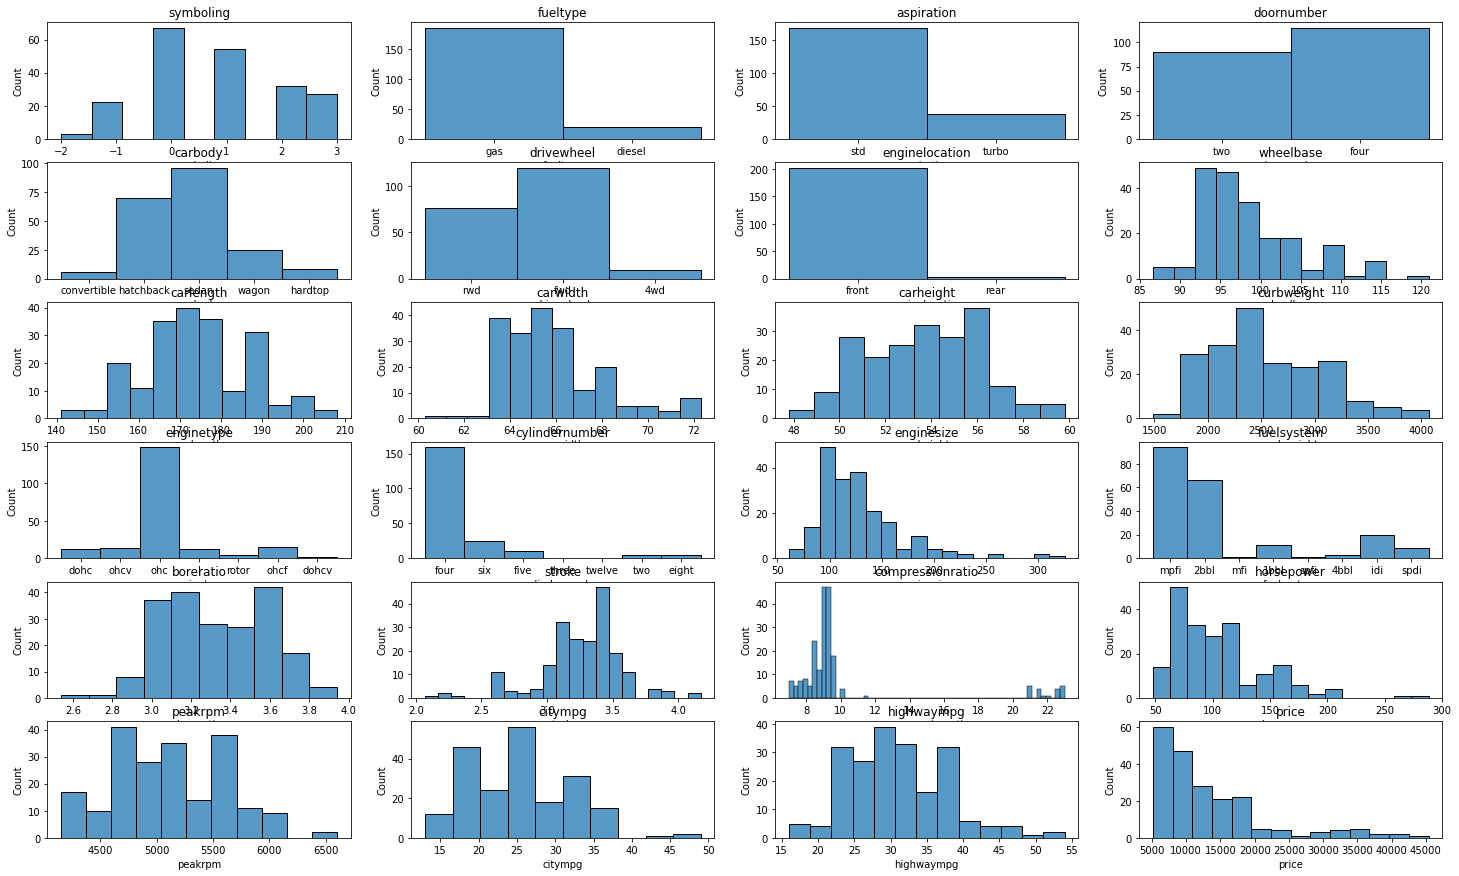

In [58]:
# Let's see the distribution of the values from each column
fig, axes = plt.subplots(6,4, figsize=(25,15))

# Looping through each column name and each subplot position
for i, ax in zip(cols_dist_df, axes.flat):
    x = sn.histplot(data=dist_df, x = i , ax = ax) # Plotting histogram plot | 
                # "x" = what the data for x axis is
                # "ax" = what is the position of this iteration within the subplot
    x.set_title(i) # Setting title                            

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

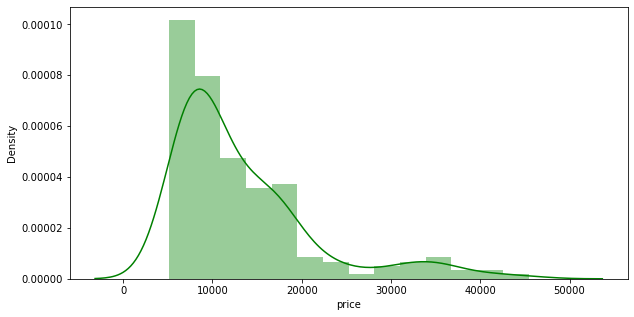

In [71]:
# Displot for our target columns; "price"
plt.figure(figsize=(10,5))

# Plotting distplot
sn.distplot(df['price'], color='g')

The distribution plot above shows us that most of the vehicles have a price of £5,000.00 - £7,500.00

-----------
#### Encoding Values

In this section we'll be encoding our columns.

Why?
1) In the next section we will be looking at the correlation matrix.
- Any data that isn't in numerical form will be ignored - this is important to avoid as the purpose of the corr. matrix is to see the relationship between all of the variables. 
- So, we'll need to make sure all variables are considered.
            
2) For our model, we will need to feed it with numerical data, strings won't work

__Make sure that you don't encode the already numerical data__
- Refer to the df.info() and only encode data that **isn't** float64 or int64; only **object**

In [78]:
# Make a copy so we don't accidentally effect the og df
en_df = df.copy()

en_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [82]:
# Locating cols to encode
cols_to_en = list(en_df.select_dtypes(include=['object']).columns)
    # Extract as a list as we will be placing this in the function to encode the columns
    # Can't have the extra info, just need col names

In [83]:
cols_to_en

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [84]:
# Import label encoder
le = LabelEncoder()

In [86]:
# Encode the required columns
en_df[cols_to_en] = en_df[cols_to_en].apply(LabelEncoder().fit_transform)

In [87]:
en_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


__Let's see what each encoded value equated to in it's original form__

In [119]:
print(f"The unique values in the column - 'fueltype' are: {df.fueltype.unique()}")
print(f"They have been encoded to: {en_df.fueltype.unique()}")
print("----------------------------------------------------------------------------------------------------")
print(f"The unique values in the column - 'aspiration' are: {df.aspiration.unique()}")
print(f"They have been encoded to: {en_df.aspiration.unique()}")
print("----------------------------------------------------------------------------------------------------")
print(f"The unique values in the column - 'doornumber' are: {df.doornumber.unique()}")
print(f"They have been encoded to: {en_df.doornumber.unique()}")
print("----------------------------------------------------------------------------------------------------")
print(f"The unique values in the column - 'carbody' are: {df.carbody.unique()}")
print(f"They have been encoded to: {en_df.carbody.unique()}")
print("----------------------------------------------------------------------------------------------------")
print(f"The unique values in the column - 'drivewheel' are: {df.drivewheel.unique()}")
print(f"They have been encoded to: {en_df.drivewheel.unique()}")
print("----------------------------------------------------------------------------------------------------")
print(f"The unique values in the column - 'enginelocation' are: {df.enginelocation.unique()}")
print(f"They have been encoded to: {en_df.enginelocation.unique()}")
print("----------------------------------------------------------------------------------------------------")
print(f"The unique values in the column - 'cylindernumber' are: {df.cylindernumber.unique()}")
print(f"They have been encoded to: {en_df.cylindernumber.unique()}")
print("----------------------------------------------------------------------------------------------------")
print(f"The unique values in the column - 'fuelsystem' are: {df.fuelsystem.unique()}")
print(f"They have been encoded to: {en_df.fuelsystem.unique()}")

The unique values in the column - 'fueltype' are: ['gas' 'diesel']
They have been encoded to: [1 0]
----------------------------------------------------------------------------------------------------
The unique values in the column - 'aspiration' are: ['std' 'turbo']
They have been encoded to: [0 1]
----------------------------------------------------------------------------------------------------
The unique values in the column - 'doornumber' are: ['two' 'four']
They have been encoded to: [1 0]
----------------------------------------------------------------------------------------------------
The unique values in the column - 'carbody' are: ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
They have been encoded to: [0 2 3 4 1]
----------------------------------------------------------------------------------------------------
The unique values in the column - 'drivewheel' are: ['rwd' 'fwd' '4wd']
They have been encoded to: [2 1 0]
----------------------------------------------

----
Using the .unique() function, we were able to present the original values from df and corresponding the encoded data from en_df

----------
#### Correlation Matrix

Let's see what variables are the most correlative with our target - Price

<AxesSubplot:>

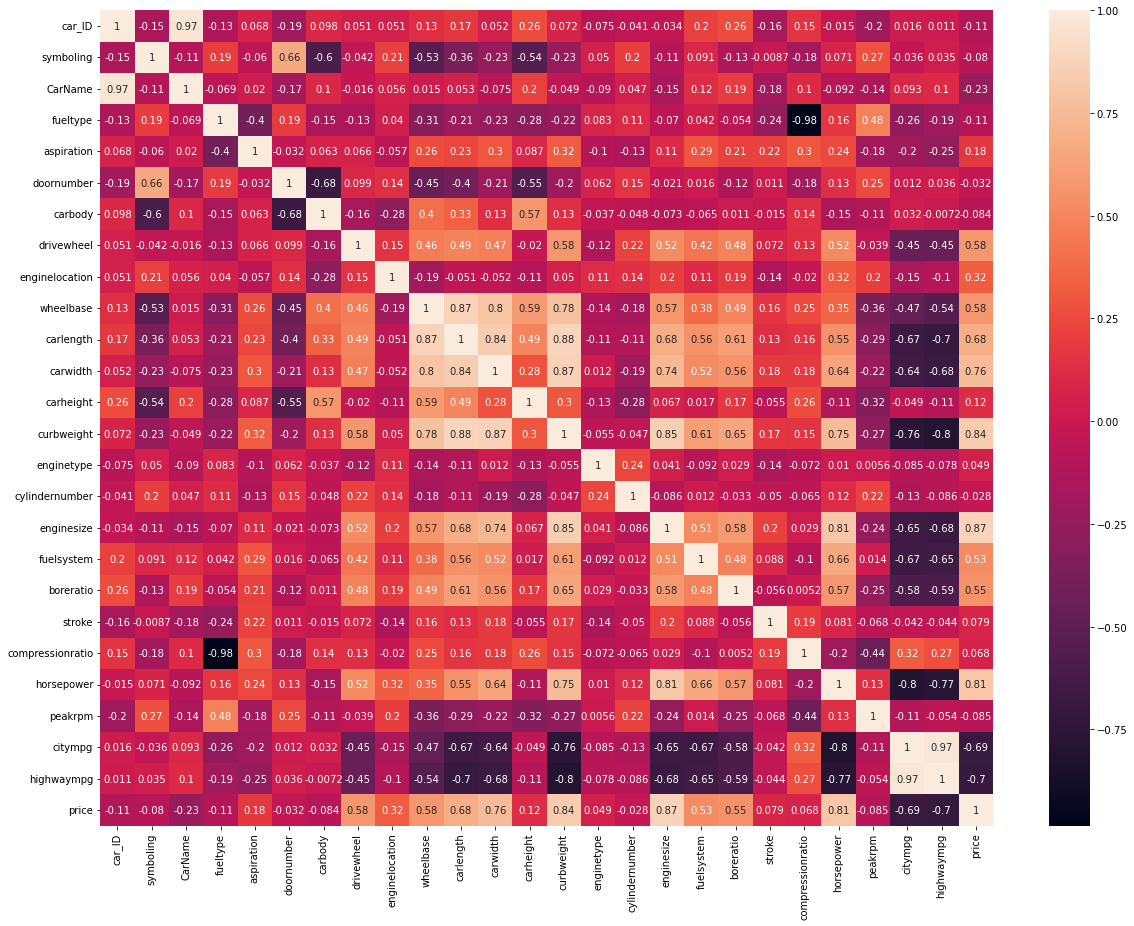

In [121]:
# Get corr
corr_total = en_df.corr()

# Plot corr
plt.figure(figsize=(20,15))
sn.heatmap(corr_total, annot=True)

The heatmap above presents to us the correlation of each variable against one another, visualising it's significance to a given variable.

Looking at the "price" column, we can see that the following variables have a _very_ poor correlation with our target:
- citympg
- highwaympg

The variables with the best correlation with our target are:
- carwidth
- curbweight
- enginesize
- horsepower

--------
### Model Prep

Before we continue to fit the model, let's visualise each explanatory variable to the response variable - to see the data relationship (linear or non-linear)
- Will help with the model selection


In [136]:
fin_df = en_df.drop(['car_ID'],axis=1)
fin_cols = fin_df.columns

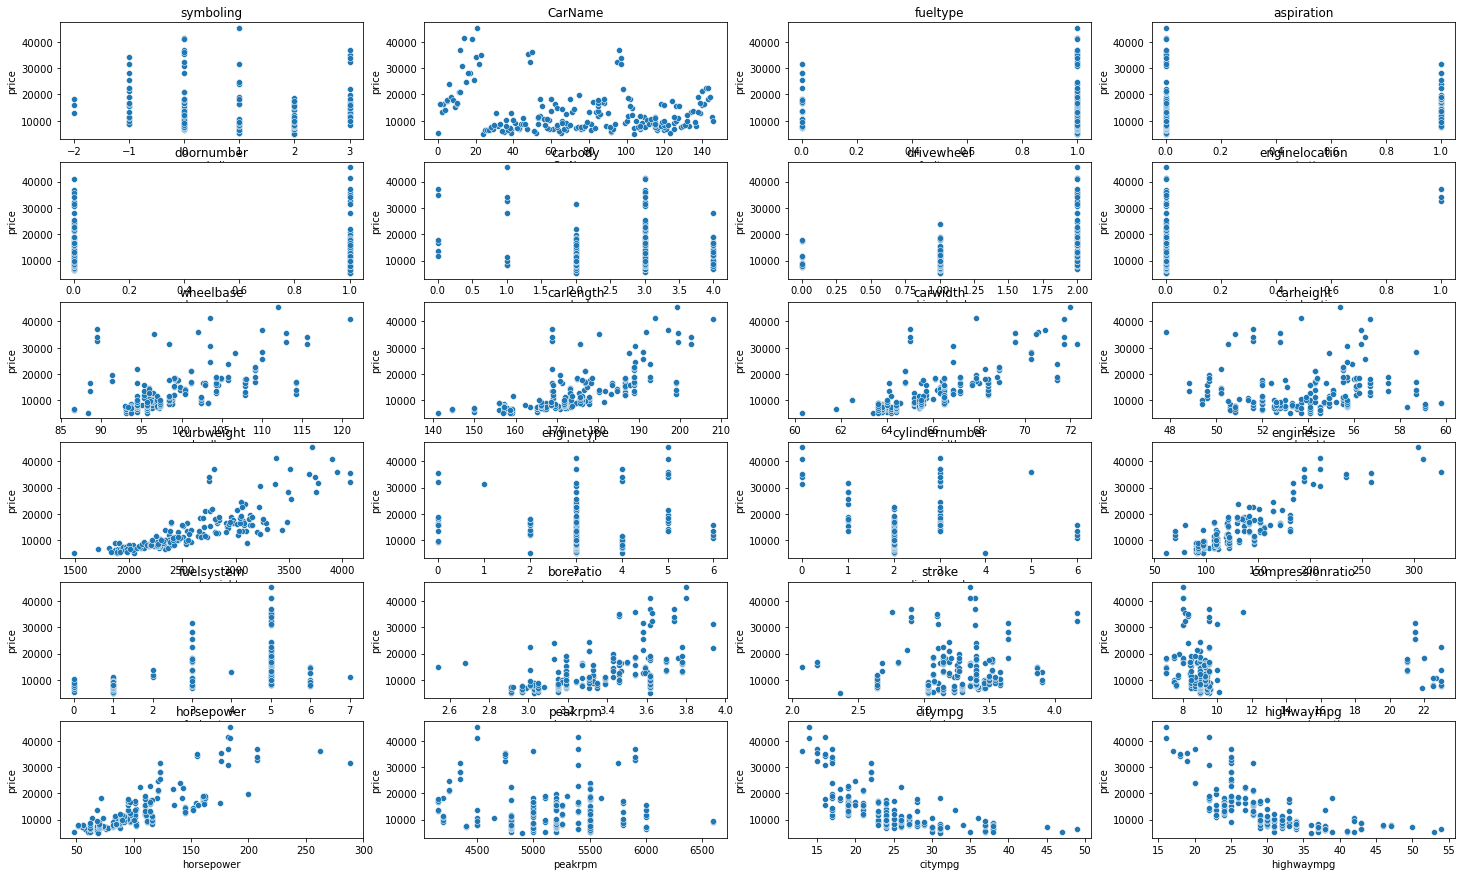

In [137]:
# Setting up subplots
fig, axes = plt.subplots(6,4, figsize=(25,15))

# Looping through each unique column name and subplot position
for i, ax in zip(fin_cols, axes.flat):
    x = sn.scatterplot(x = en_df[i], y = en_df['price'], ax=ax)
    x.set_title(i) # Setting title to the plot

In [138]:
fin_df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [208]:
# Splitting data into x and y
x = fin_df[fin_df.columns[:-2]] # Explanatory variables
y = fin_df[fin_df.columns[-1]] # Response/Target variable

In [271]:
# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

--------
#### Model Fitting - GridSearch

Before we finalize the model, let's use GridSearch to find the best parameter values for our Random Forest


In [259]:
# Calling our model
rf_model = RandomForestRegressor(random_state=42)

In [272]:
# Setting our parameter grid for our GridSearch
## Implement all of the parameters that you want to fine tune
param_grid = {'n_estimators': [20, 40, 50, 60, 80, 100],
             'criterion' : ['mse', 'mae'],
             }

In [273]:
# Call the GridSearch with our Random Forest model and our parameter grid
CV_rf_model = GridSearchCV(estimator = rf_model, param_grid = param_grid)

# Fit the GridSearch with our train and test data
CV_rf_model.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'criterion': ['mse', 'mae'],
                         'n_estimators': [20, 40, 50, 60, 80, 100]})

In [274]:
# Now we can use the .best_params_ function to get the set of parameters to use for out final model
CV_rf_model.best_params_

{'criterion': 'mae', 'n_estimators': 50}

Now that we've got the best parameters for our model, we can now fit our final model with the optimal parameters.

----------
#### Model - Final


In [275]:
# Calling a new Random Forest variable
## This time with the most optimal parameters set
rand_forest = RandomForestRegressor(n_estimators = 50, criterion='mae')

In [276]:
# Fit the final model
rand_forest.fit(x_train, y_train)

RandomForestRegressor(criterion='mae', n_estimators=50)

In [277]:
# Get model score
rand_forest.score(x_test, y_test)

0.9297813283215979

In [295]:
# Getting model score - alternative
y_pred = rand_forest.predict(x_test)

print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(mean_squared_log_error(y_test, y_pred))

0.9297813283215979
4789008.959442429
0.015827623152538748
